不動産価格
目標
・住所ごとの価格の変化
・売買契約が結ばれた場所の地図上での可視化

In [1]:
# coding: utf-8
import pprint
import json
import requests
import pandas as pd
import csv

#httpsでないと通らない
url = "https://www.land.mlit.go.jp/webland/api/TradeListSearch?from=20151&to=20152&city=13102"

city = '12101' # Chiba city
from_quarter = '20191' # 2018Q1 = 2018-01 to 2-18-03
to_quarter = '20192' # 2018Q2 = 2018-04 to 2-18-06
baseuri='https://www.land.mlit.go.jp/webland/api/TradeListSearch?'
station="00001"
uri = baseuri + "from=" + from_quarter + "&to=" + to_quarter+ '&city=' + city
#uri = baseuri + "from=" + from_quarter + "&to=" + to_quarter+"&station="+ station
#print(url)
#print(uri)

headers = {'content-type': 'application/json'}


response = requests.get(uri)
jsonData = response.json()

#Get keys
keys=[]
data_num = len(jsonData["data"])

for i in range(data_num):
    keys.extend(list(jsonData["data"][i].keys()))
keys = set(keys)

#Get data
output=[keys]
for i in range(data_num):
    temp=[]
    for key in keys:
        try:
            temp.append(jsonData["data"][i][key])
        except:
            temp.append("NaN")
    output.append(temp)

#Export CSV file
with open("output.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(output)

df=pd.read_csv("output.csv")
df.head()
#print("done")



Breadth  PricePerUnit Structure  ... DistrictName UnitPrice  CityPlanning
0      NaN           NaN        ＲＣ  ...          青葉町       NaN       第２種住居地域
1      6.0           NaN        木造  ...          青葉町       NaN   第１種低層住居専用地域
2      NaN           NaN       NaN  ...          青葉町       NaN           NaN
3      4.0           NaN        木造  ...          赤井町       NaN  第２種中高層住居専用地域
4      4.0      170000.0       NaN  ...          赤井町   53000.0           NaN

[5 rows x 27 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text

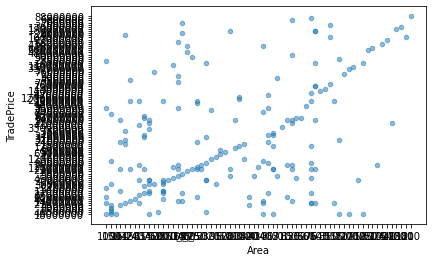

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.DataFrame(output)
#with codecs.open("output.csv", "r", "Shift-JIS", "ignore") as file:
#    data = pd.read_table(file, delimiter=",")
data.columns=data.iloc[0]
data=data.drop(data.index[0])
#data["Area"].where(data["Area"]=="2000㎡",2000,inplace=True)
data["Area"].replace("2000㎡",2000)
data["Area"].head()
#dataは文字列なので変換が必要
data.plot.scatter(x="Area",y="TradePrice",alpha=0.5)



In [ ]:
# 地名の重複をのぞいてリスト化する
adress=pd.DataFrame(data["DistrictName"])
ad=adress.drop_duplicates()
ad=ad.reset_index()
print(ad)

serial_num = pd.RangeIndex(start=1, stop=len(ad.index) + 1, step=1)
ad["No."]=serial_num


    index DistrictName
0       1          青葉町
1       4          赤井町
2       7           旭町
3       8           亥鼻
4       9           今井
5      13          今井町
6      14         鵜の森町
7      15          大森町
8      21          生実町
9      28           春日
10     33           葛城
11     40           要町
12     41          亀井町
13     42          川戸町
14     46           栄町
15     50          寒川町
16     51          塩田町
17     53         汐見丘町
18     55           白旗
19     59           新宿
20     64          新千葉
21     66          新田町
22     68           新町
23     71          神明町
24     72           末広
25     75           蘇我
26     78         大巌寺町
27     79         千葉寺町
28     83          千葉港
29     88           中央
30     97           椿森
31    101          鶴沢町
32    103          出洲港
33    105          道場北
34    106          道場南
35    109          問屋町
36    113           長洲
37    116         仁戸名町
38    123           登戸
39    126          花輪町
40    129          浜野町
41    134          東千葉
42    135  

In [ ]:
!pip install geocoder
import geocoder


In [ ]:
#ジオコーディングするパッケージをインストール
!pip install simple-geocoding

ERROR: Could not find a version that satisfies the requirement simple-geocoding (from versions: none)
ERROR: No matching distribution found for simple-geocoding


In [ ]:
"""
住所と経度緯度の関係について下記ページでダウンロード
https://github.com/geolonia/japanese-addresses
"""
import pandas as pd
import codecs
with codecs.open("Adress.csv", "r", "Shift-JIS", "ignore") as file:
    df_map = pd.read_table(file, delimiter=",")
    print(df_map)
#Adress.csvは全国市町村のデータなのでそこから千葉市のみを取り出す．
df_Chiba=df_map.query('市区町村コード == 12101')
df_Chiba.head()
df_Chiba.to_csv("Adress_chiba-city.csv", encoding="shift_jis")

        都道府県コード 都道府県名 都道府県名カナ  ... 小字・通称名         緯度          経度
0             1   北海道  ホッカイドウ  ...    NaN  43.042230  141.319722
1             1   北海道  ホッカイドウ  ...    NaN  43.039768  141.321733
2             1   北海道  ホッカイドウ  ...    NaN  43.039569  141.319617
3             1   北海道  ホッカイドウ  ...    NaN  43.038819  141.323040
4             1   北海道  ホッカイドウ  ...    NaN  43.036547  141.322217
...         ...   ...     ...  ...    ...        ...         ...
241155       33   岡山県  オカヤマケン  ...    NaN  34.653076  133.947359
241156       33   岡山県  オカヤマケン  ...    NaN  34.652935  133.951631
241157       33   岡山県  オカヤマケン  ...    NaN  34.651373  133.945655
241158       33   岡山県  オカヤマケン  ...    NaN  34.648374  133.943239
241159       33   岡山県       オ  ...    NaN        NaN         NaN

[241160 rows x 14 columns]


https://qiita.com/taka_baya/items/85bd0865245354d388ee
https://akatak.hatenadiary.jp/entry/2018/09/15/090032
https://akatak.hatenadiary.jp/entry/2019/03/03/114431

In [ ]:
"""
安藤さんに丁目を削除してもらったファイルがAdress_Chiba-city3.csv
今回はこれを使う
"""
#手動でoutput.csvを.txtで保存．ANSIを文字コードとして選ぶ．
#改めてエクセルからデータインポートで上記txtを読んで保存する作業が必要．

with codecs.open("output.csv", "r", "Shift-JIS", "ignore") as file:
    df_output = pd.read_table(file, delimiter=",")

with codecs.open("Adress_Chiba-city3.csv", "r", "Shift-JIS", "ignore") as file:
    df_address = pd.read_table(file, delimiter=",")

#df_output = pd.read_csv('output.csv',engine="python")
#df_address = pd.read_csv('Adress_Chiba-city3.csv',engine="python")

# CSVマージ(DistrictNameカラムで結合)
df_output = df_output.merge(df_address, on='DistrictName', how='left')
df_output.head()
# CSV出力
df_output.to_csv('merge.csv',encoding="shift-jis")


In [ ]:
#可視化ライブラリのインストール
!pip install folium

In [ ]:
import pandas as pd
import folium
import codecs
with codecs.open("merge.csv", "r", "Shift-JIS", "ignore") as file:
    df_realestate = pd.read_table(file, delimiter=",")

map = folium.Map(location=[35.59724,140.139851], zoom_start=14)
df_latlong=df_realestate.loc[:,["緯度","経度"]]
df_latlong.head() 

for i,r in df_latlong.iterrows():
    folium.Marker(location=[r['緯度'], r['経度']]).add_to(map)
map.save("map_chiba.html")